US Baby Names 1880-2010

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tnames = ['name', 'sex', 'births']
names1880 = pd.read_csv('names/yob1880.txt', header=None, names=tnames)
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
names1880.groupby('sex')['births'].sum() # number of people born this year by gender

sex
F     90994
M    110490
Name: births, dtype: int64

In [4]:
years = range(1880, 2023)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame) # array containtn all info from txt
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True) #ignore_index=True because we’re not interested in preserving the original row numbers
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
names.shape

(2085158, 4)

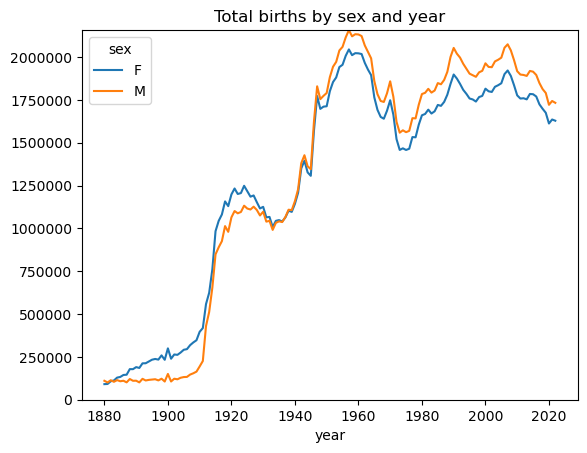

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442


In [6]:
total_births = names.pivot_table(index='year', columns='sex', values='births', aggfunc="sum")
ax = total_births.plot(title='Total births by sex and year')
ax.set_ylim(0, total_births.max().max()) 
ax.ticklabel_format(style='plain', axis='y')
plt.show()
total_births.head()

In [7]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop']=births/births.sum()
    return group
names=names.groupby(['year','sex'], as_index=False).apply(add_prop)
np.allclose(names.groupby(['year','sex']).prop.sum(),1) #np.allclose to check that the group sums are sufficiently close to (but perhaps not exactly equal to) 1
names.reset_index(inplace=True, drop=True) # drop=True parameter specifies that the current index should be discarded rather than being added as a new column in the dataframe.
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [8]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    # year (1880, 'F'), group (all col from df)
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Analyzing Naming Trends

In [9]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [10]:
total_births = top1000.pivot_table(index='year', columns='name', values='births', aggfunc='sum').fillna(0) # aggfunc='sum' must be string
total_births.head()


name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,...,7.0,0.0,8.0,28.0,0.0,27.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,...,10.0,0.0,9.0,21.0,0.0,27.0,0.0,0.0,0.0,0.0
1882,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,...,9.0,0.0,17.0,32.0,0.0,21.0,0.0,0.0,0.0,0.0
1883,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,...,10.0,0.0,11.0,35.0,0.0,25.0,0.0,0.0,0.0,0.0
1884,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,...,14.0,6.0,8.0,58.0,0.0,27.0,0.0,0.0,0.0,0.0


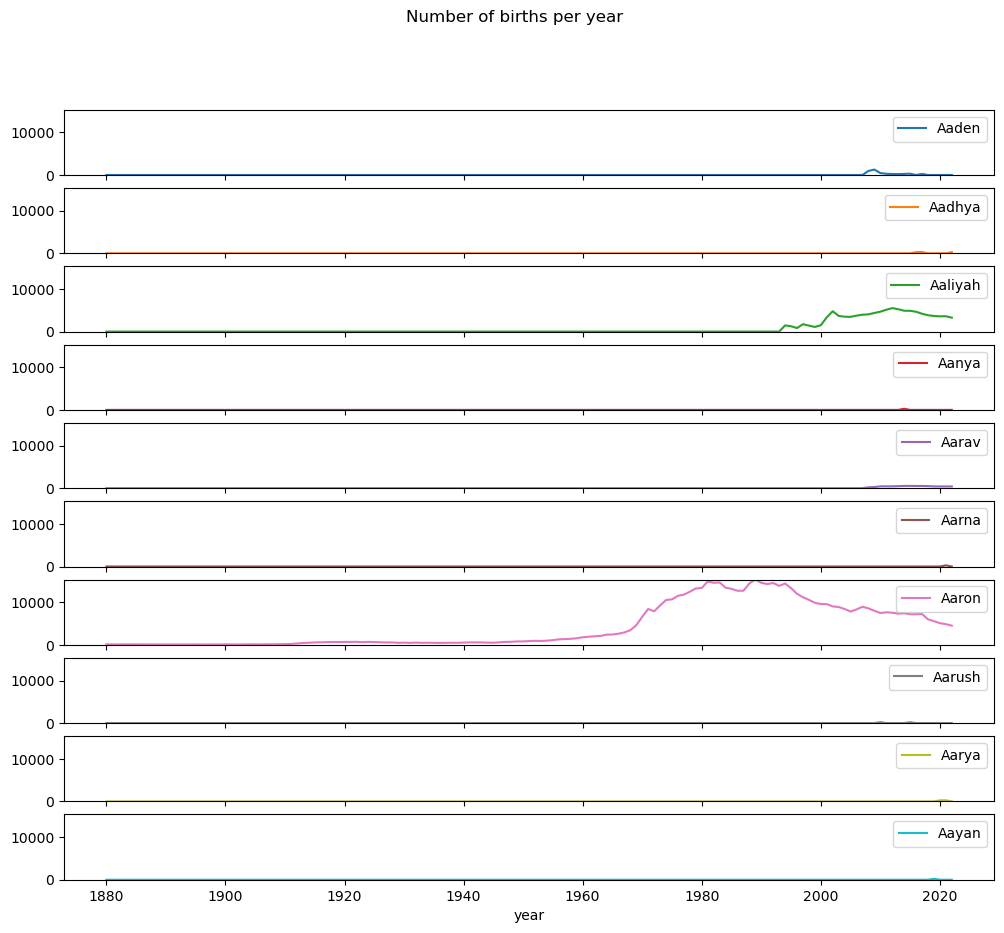

In [11]:
# plotting based on the slice
x = 20
y = 10
max_value= total_births.iloc[: , :y].values.max()
ax = total_births.iloc[: , :y].plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year', sharex=True, ylim=(0, max_value))

In [12]:
# showing the top 10
sorted_total_births = total_births[total_births.columns].sum().sort_values(ascending=False)
sorted_total_births # gives panda series from highest to lowest
filtered_total_births = total_births[sorted_total_births[0:10].index]
max_value= filtered_total_births.iloc[: , :].values.max()

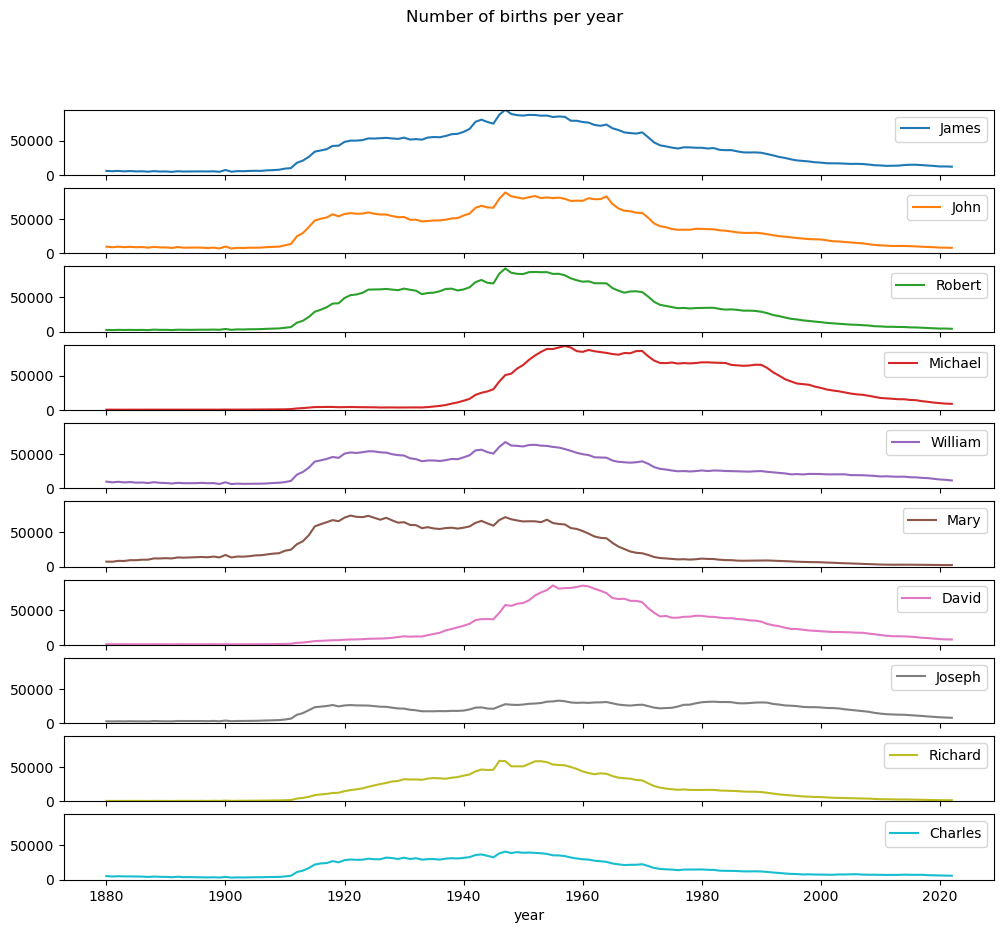

In [13]:
ax = filtered_total_births.iloc[: , :].plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year', sharex=True, ylim=(0, max_value))

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

<Figure size 640x480 with 0 Axes>

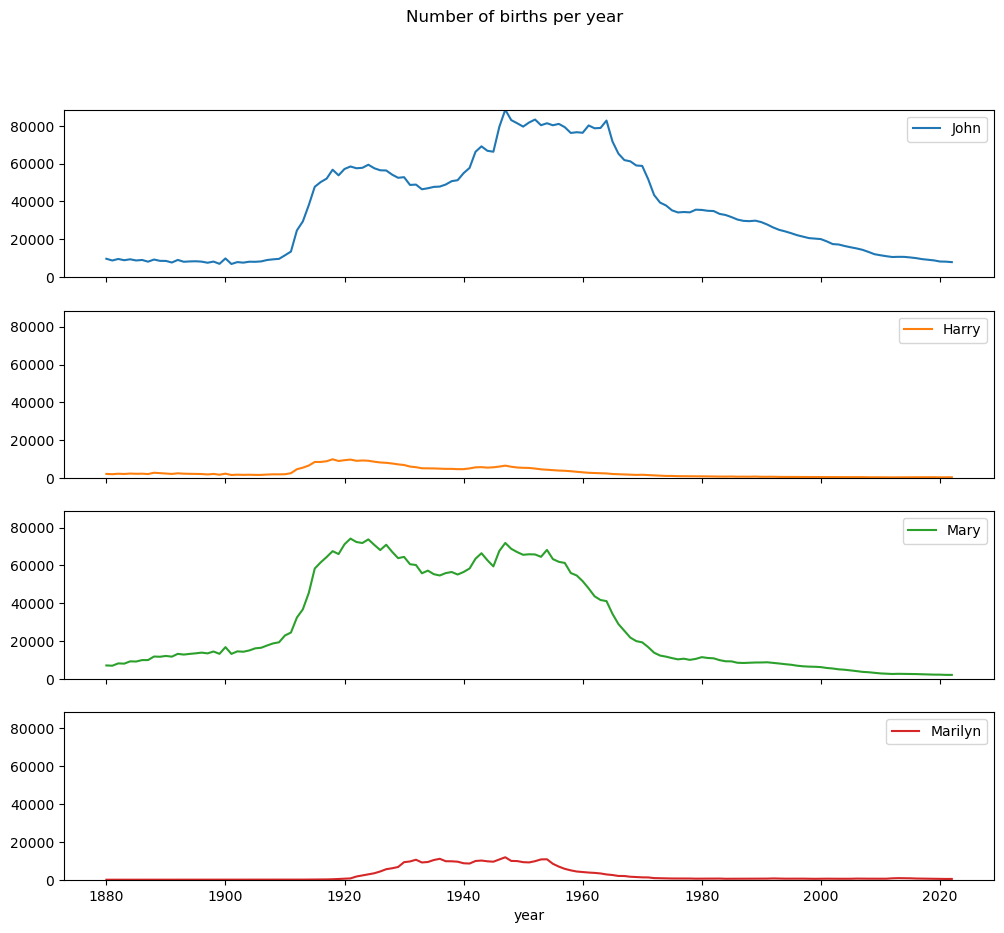

In [14]:
# plotting based on specific names
subest = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
max_value = subest.values.max()
plt.tight_layout()
subest.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year', sharex=True, ylim=(0, max_value))

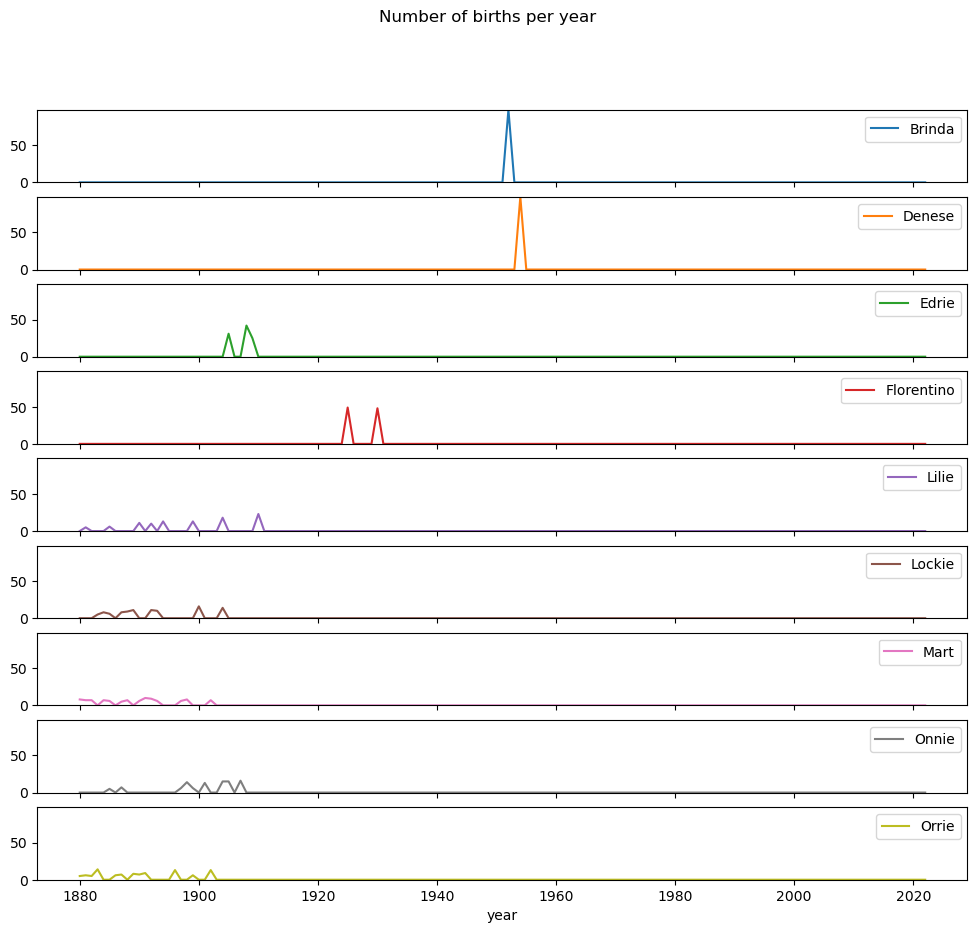

In [15]:
# plotting based on specific number of instances 
numb = 1000
filtered_total_births = total_births.loc[:, (total_births.sum(axis=0) < 100) & (total_births.sum(axis=0) > 95)]
filtered_total_births
# x = 20
# y = 10
max_value= filtered_total_births.iloc[: , :].values.max()
ax = filtered_total_births.iloc[: , :].plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year', sharex=True, ylim=(0, max_value))